In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [36]:
!pip install feature-engine

In [37]:
df.isna().sum().sort_values(ascending=False)

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [38]:
df.duplicated().sum()

0

In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


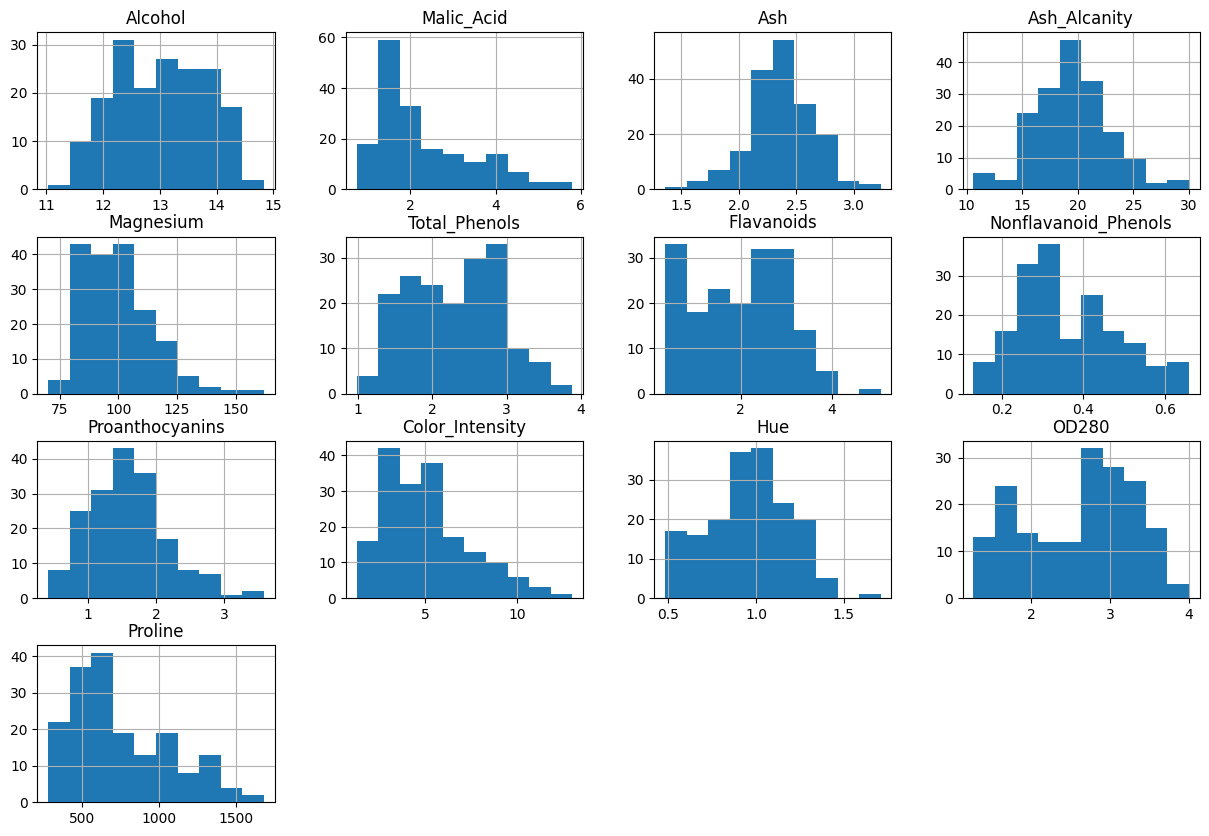

In [40]:
df.hist(figsize=(15, 10))

plt.show()

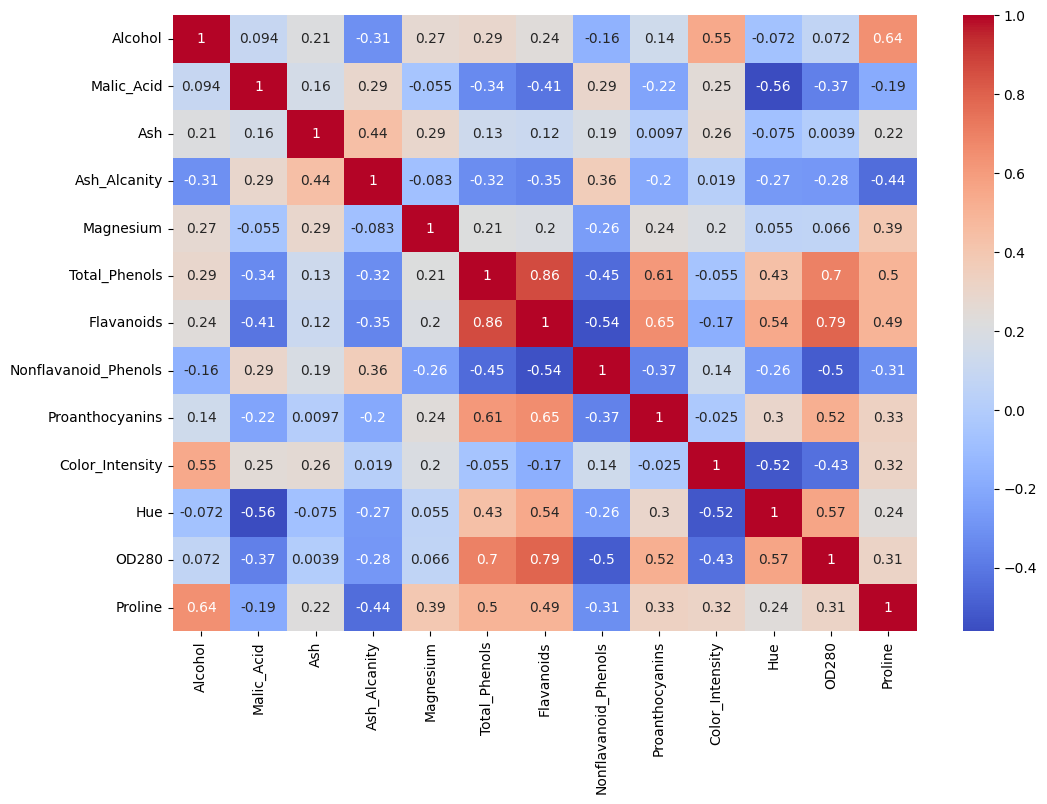

In [41]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

In [42]:
numeric_cols = [var for var in df.columns if df[var].dtype != 'object']
numeric_cols

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

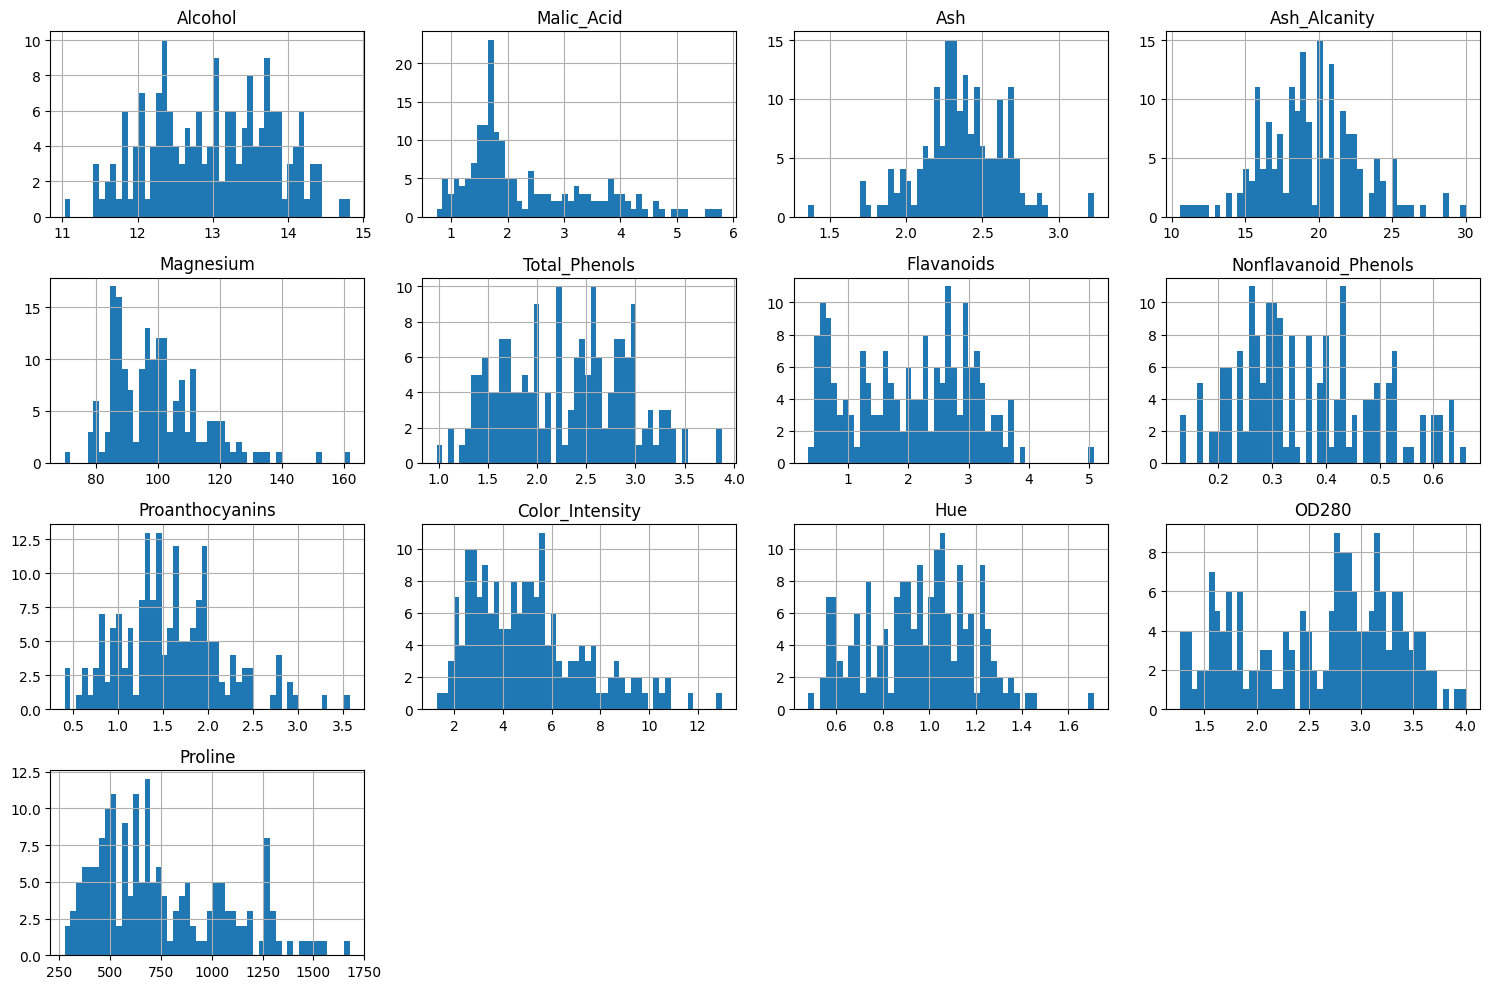

In [43]:
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

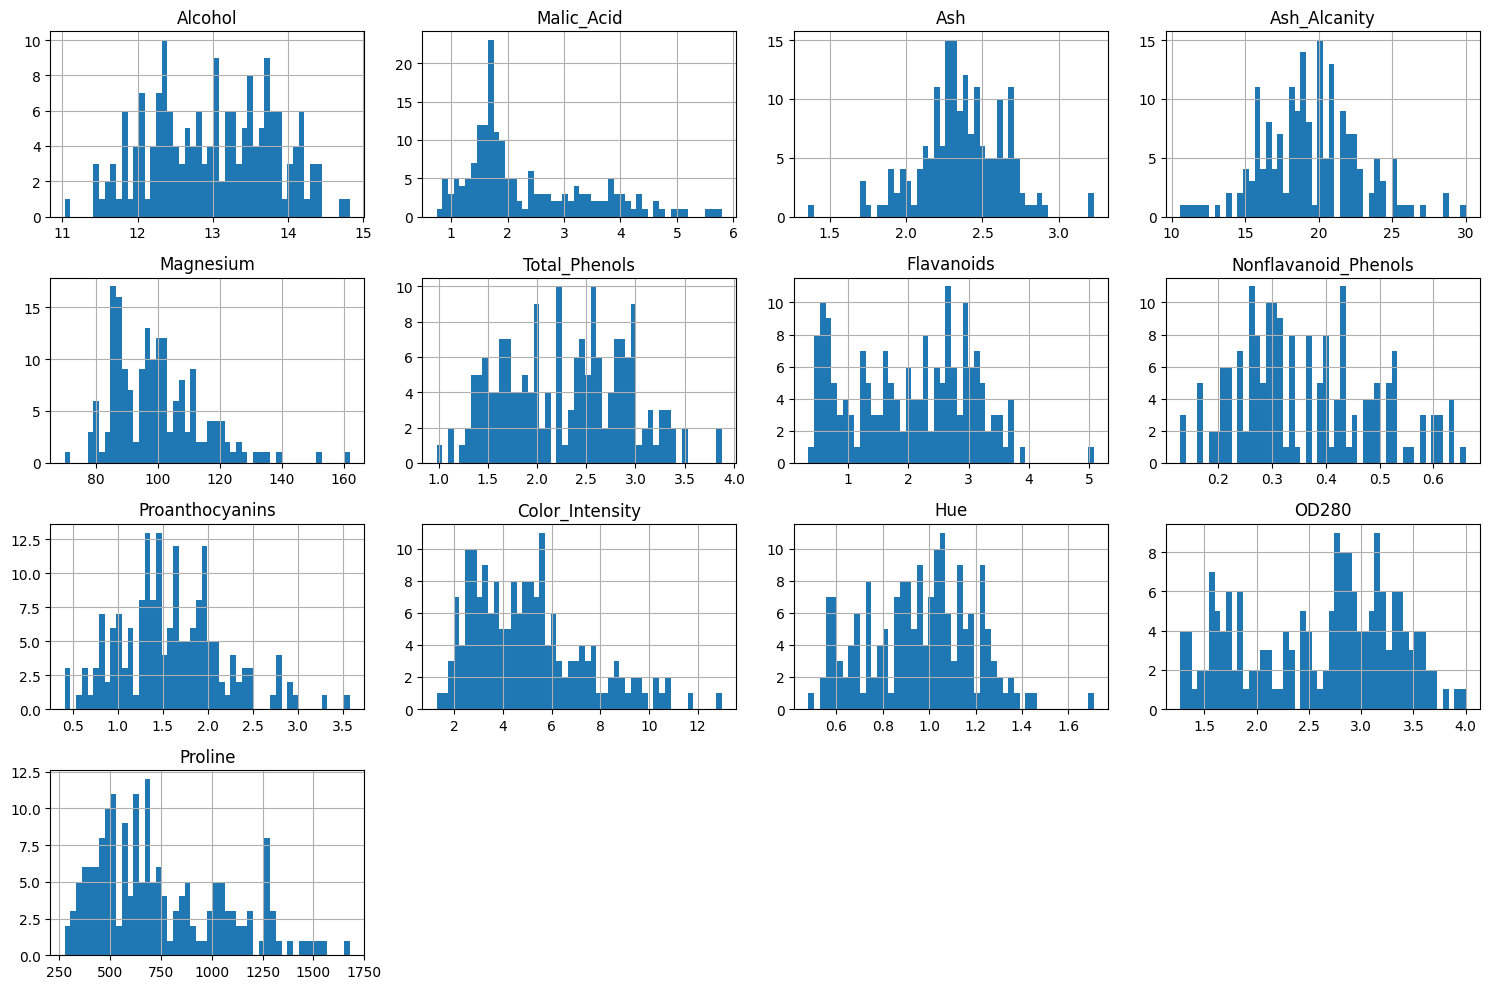

In [45]:
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2', 'PC3'])
df_pca.head()

,PC1,PC2,PC3
0,318.562979,21.492131,-3.130735
1,303.097420,-5.364718,-6.822835
2,438.061133,-6.537309,1.113223
3,733.240139,0.192729,0.917257
4,-11.571428,18.489995,0.554422


In [47]:
pca2 = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

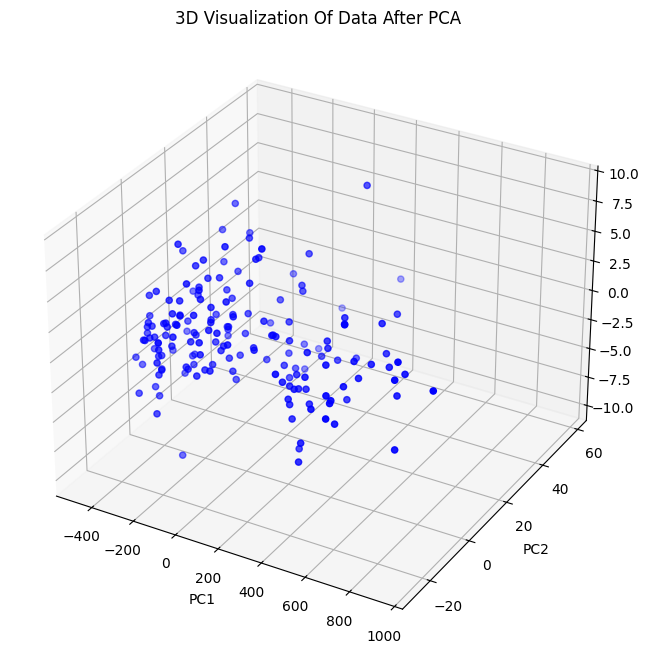

In [48]:
x, y, z = df_pca['PC1'], df_pca['PC2'], df_pca['PC3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("3D Visualization Of Data After PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

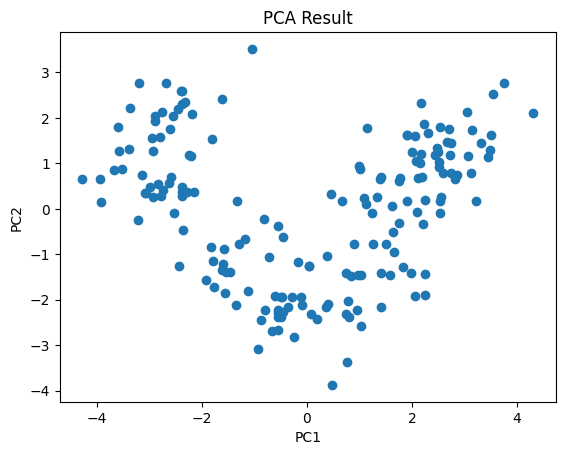

In [49]:
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Result')
plt.show()

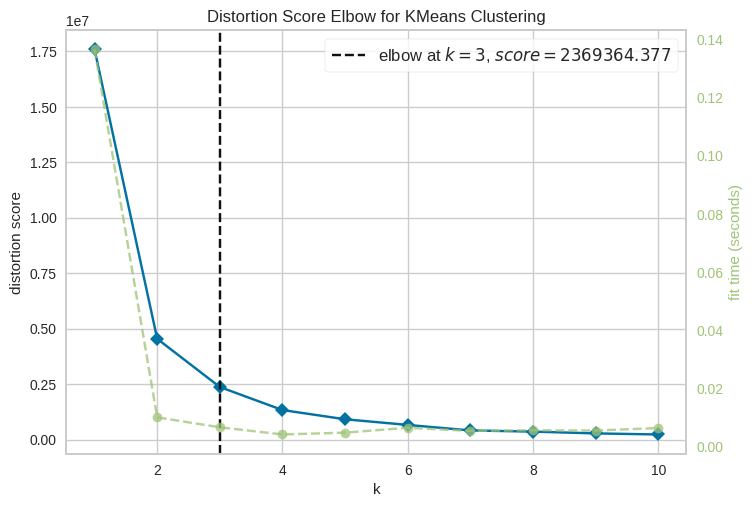

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(df_pca)
visualizer.show()

In [52]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

In [53]:
df['Cluster'] = cluster_labels

In [54]:
cluster_means = df.groupby('Cluster').mean()

print(cluster_means)

           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        12.250923    1.897385  2.231231     20.063077   92.738462   
1        13.134118    3.307255  2.417647     21.241176   98.666667   
2        13.676774    1.997903  2.466290     17.462903  107.967742   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               2.973077  1.062708  2.803385   510.169231  
1               7.234706  0.691961  1.696667   619.058824  
2               5.45354

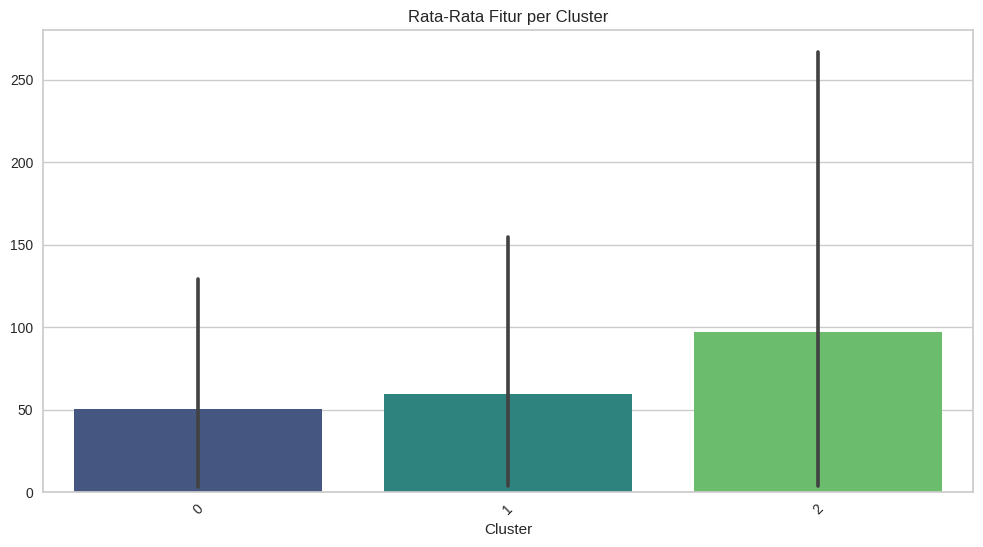

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_means.T, palette='viridis')
plt.title('Rata-Rata Fitur per Cluster')
plt.xticks(rotation=45)
plt.show()

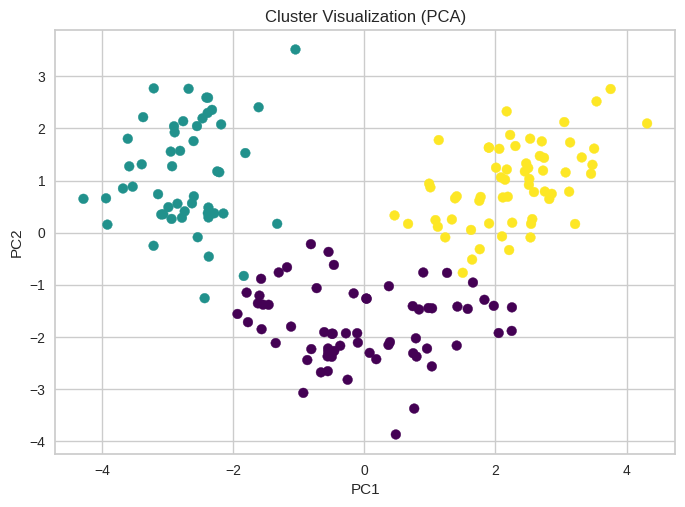

In [56]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization (PCA)')
plt.show()

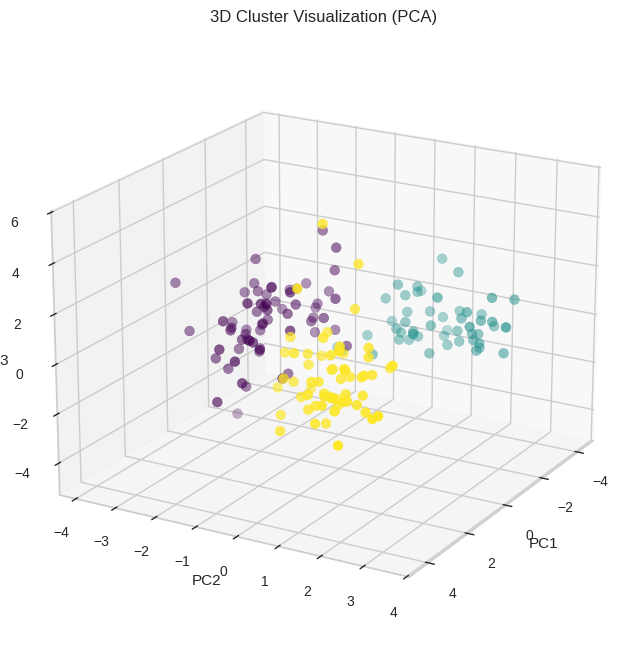

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(

    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=cluster_labels,
    cmap='viridis',
    s=50,
    depthshade=True
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Cluster Visualization (PCA)')
ax.view_init(elev=20, azim=30)

plt.show()

In [63]:
from sklearn.feature_selection import f_classif
X = df.drop('Cluster', axis=1)
y = df['Cluster']
f_values, p_values = f_classif(X, y)
significant_features = pd.DataFrame({
    'Feature': X.columns,

    'F-value': f_values,

    'p-value': p_values
})
print(significant_features.sort_values('F-value', ascending=False))

                 Feature     F-value       p-value
6             Flavanoids  271.589820  2.215307e-54
11                 OD280  221.528359  1.124217e-48
12               Proline  200.312007  5.671203e-46
0                Alcohol  113.166071  2.878951e-32
9        Color_Intensity  111.923105  4.958504e-32
5          Total_Phenols  106.883165  4.656641e-31
10                   Hue  104.746880  1.224661e-30
1             Malic_Acid   38.668932  1.236993e-14
8        Proanthocyanins   36.212366  6.911261e-14
7   Nonflavanoid_Phenols   30.983638  3.024102e-12
3           Ash_Alcanity   24.549972  4.001072e-10
4              Magnesium   22.718545  1.692079e-09
2                    Ash   14.915678  1.043856e-06


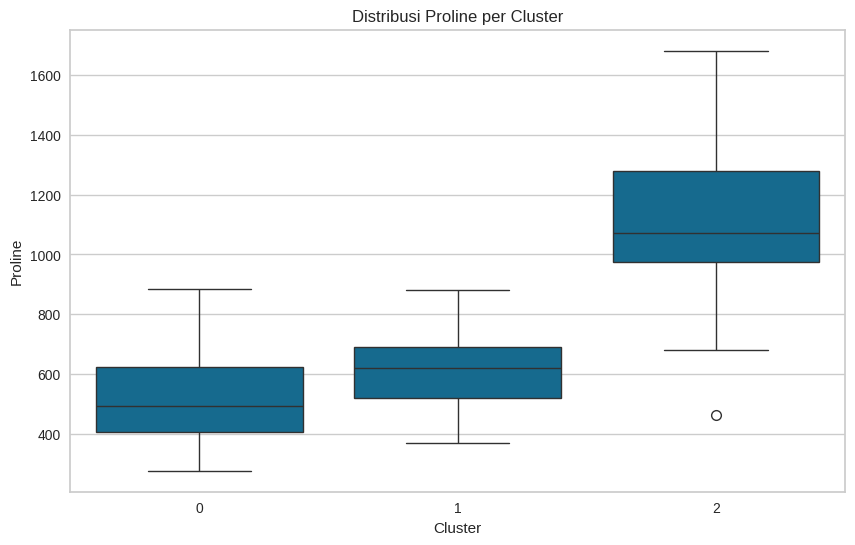

In [64]:
significant_feature = 'Proline'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=significant_feature, data=df)
plt.title(f'Distribusi {significant_feature} per Cluster')
plt.show()

In [65]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(df_scaled)
print("Jumlah cluster DBSCAN:", len(set(db_labels)) - (1 if -1 in db_labels else 0))

Jumlah cluster DBSCAN: 0


In [66]:
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    top_features = cluster_data.mean().sort_values(ascending=False)[:3]
    print(top_features)


Cluster 0:
Proline         510.169231
Magnesium        92.738462
Ash_Alcanity     20.063077
dtype: float64

Cluster 1:
Proline         619.058824
Magnesium        98.666667
Ash_Alcanity     21.241176
dtype: float64

Cluster 2:
Proline         1100.225806
Magnesium        107.967742
Ash_Alcanity      17.462903
dtype: float64


- Ciri Kimia dominan pada cluster 0 :
> Proline dan Color Intensity yang tinggi

- Ciri Kimia dominan pada cluster 1 ⁉
> Ash Rendah dan Magnesium yang tinggi

- Ciri Kimia dominan pada cluster 2:
> Malic Acid tinggi, Flavonoids rendah

- Cluster 0 memiliki potensi kultivar 3, cluster 1 memiliki potensi kultivar 1 dan cluster 3 memiliki potensi kultivar 3

- Kesimpulannya Cluster 0 memiliki kadar proline dan intensitas warna tertinggi, cocok untuk anggur dengan rasa kuat, sedangkan Cluster 1 ditandai dengan magnesium tinggi dan kadar abu rendah, yang menjadi indikator kematangan buah yang baik.